<h1 style="text-align: center; color: red ">Intelligent Document Classification</h1>

 ---



### Install Kaggle

---



In [42]:
!pip install --upgrade --force-reinstall --no-deps kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached kaggle-1.5.13-py3-none-any.whl
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.13
    Uninstalling kaggle-1.5.13:
      Successfully uninstalled kaggle-1.5.13


In [43]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"[USERNAME]","key":"[PASSWORD]"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [44]:
# ! kaggle datasets download -d nbhativp/first-half-training

In [45]:
# ! kaggle datasets download -d orllem456/rvlcdip

In [46]:
! kaggle datasets download -d shaz13/real-world-documents-collections

real-world-documents-collections.zip: Skipping, found more recently modified local copy (use --force to force download)


/content/real-world-documents-collections.zip

In [47]:
# importing required modules
from zipfile import ZipFile

In [48]:
# specifying the zip file name
file_name = "real-world-documents-collections.zip"

In [49]:
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    # zip.printdir()

    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

Extracting all the files now...
Done!


### Data Preprocessing

---

In [50]:
import os

In [51]:
folderlist=os.listdir("./docs-sm")

In [52]:
folderlist

['invoice',
 'file_folder',
 'memo',
 'specification',
 'letter',
 'scientific_publication',
 'scientific_report',
 'budget',
 'resume',
 'handwritten',
 'questionnaire',
 'form',
 'email',
 'advertisement',
 'presentation',
 'news_article']

In [53]:
required_folders = ['form','resume','letter','invoice', 'questionnaire']

In [54]:
parent="./docs-sm"

/content/docs-sm/questionnaire

In [55]:
import shutil

In [56]:
for x in folderlist:
  if x not in required_folders:
    path = os.path.join(parent, x) 
    #os.rmdir(path) 
    shutil.rmtree(path, ignore_errors=True)

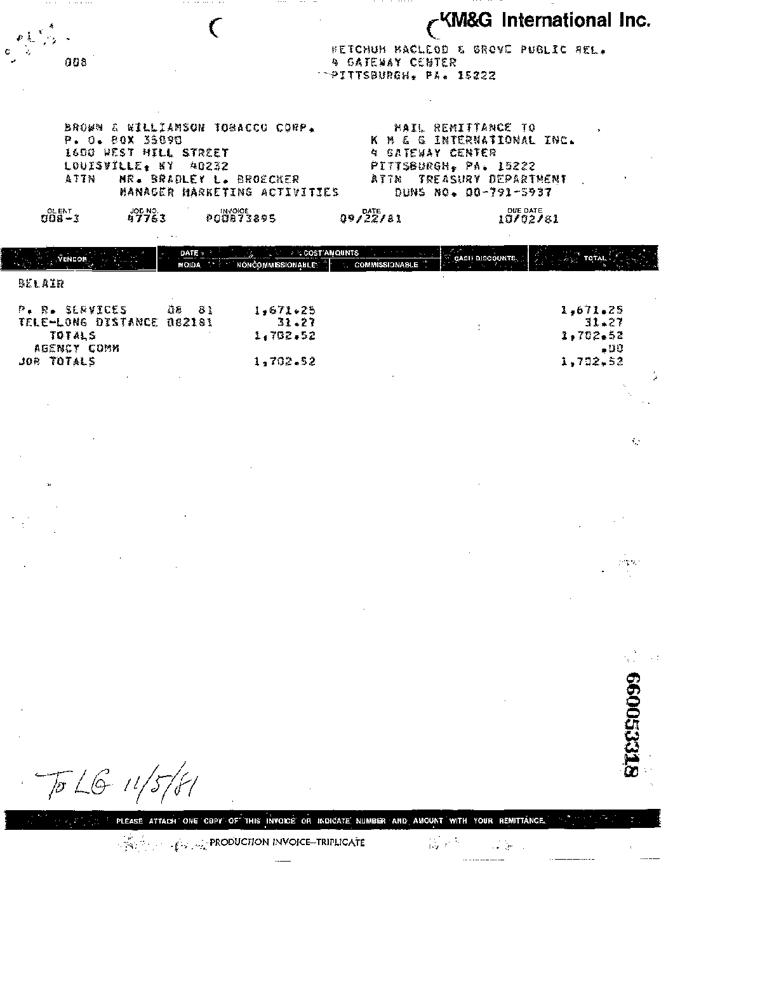

In [57]:
from PIL import Image, ImageDraw, ImageFont

image = Image.open("/content/docs-sm/invoice/0000137486.jpg")
#image = image.convert("RGB")
image

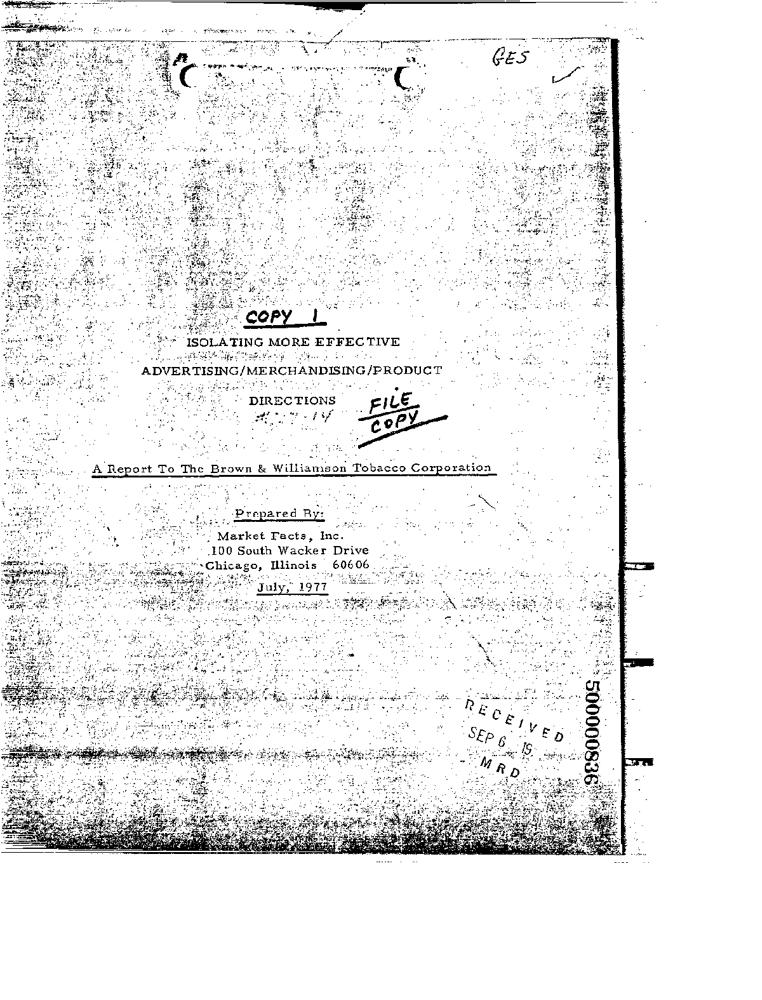

In [58]:
image = Image.open("/content/docs-sm/questionnaire/0000002206.jpg")
image = image.convert("RGB")
image

In [59]:
! sudo apt install tesseract-ocr
! pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2build2).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
import pytesseract
import numpy as np

ocr_df = pytesseract.image_to_data(image, output_type='data.frame')
ocr_df = ocr_df.dropna().reset_index(drop=True)
float_cols = ocr_df.select_dtypes('float').columns
ocr_df[float_cols] = ocr_df[float_cols].round(0).astype(int)
ocr_df = ocr_df.replace(r'^\s*$', np.nan, regex=True)
words = ' '.join([word for word in ocr_df.text if str(word) != 'nan'])
words

'cory 1 MORE EFFECTIVE ING /MERCHANDISING /PRODUCT pinserions | gjLE “ =E9ey A Report To The Brown & Williamson Tobacco Corporation -N\\ Market Facts, Inc. 100 South Wacker Drive vo, Prepared ay:'

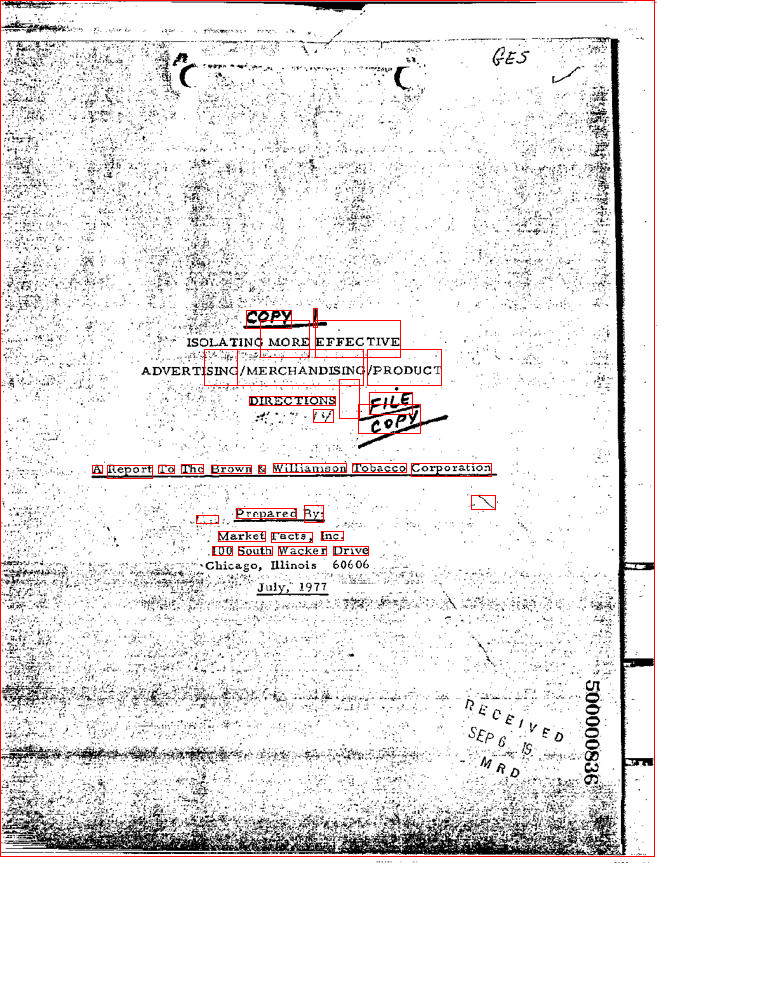

In [61]:
coordinates = ocr_df[['left', 'top', 'width', 'height']]
actual_boxes = []
for idx, row in coordinates.iterrows():
    x, y, w, h = tuple(row) # the row comes in (left, top, width, height) format
    actual_box = [x, y, x+w, y+h] # we turn it into (left, top, left+width, top+height) to get the actual box 
    actual_boxes.append(actual_box)

draw = ImageDraw.Draw(image, "RGB")
for box in actual_boxes:
  draw.rectangle(box, outline='red')

image

In [62]:
width, height = image.size

In [63]:
ocr_df = pytesseract.image_to_data(image, output_type='data.frame')
float_cols = ocr_df.select_dtypes('float').columns
ocr_df = ocr_df.dropna().reset_index(drop=True)
ocr_df[float_cols] = ocr_df[float_cols].round(0).astype(int)
ocr_df = ocr_df.replace(r'^\s*$', np.nan, regex=True)
ocr_df = ocr_df.dropna().reset_index(drop=True)

In [64]:
ocr_df

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,5,1,1,1,1,1,316,337,84,9,93,EFFECTIVE
1,5,1,7,1,1,1,240,366,201,19,16,/MERCHANDISING/PRODUCT}
2,5,1,16,1,1,1,250,397,85,8,96,DIRECTIONS
3,5,1,20,1,1,1,190,515,29,10,22,fa.
4,5,1,20,1,1,2,227,505,98,19,21,Ee
5,5,1,20,1,2,1,208,527,58,23,73,Marked
6,5,1,20,1,2,2,269,527,47,23,45,fects]
7,5,1,20,1,2,3,321,531,23,10,47,nc]
8,5,1,20,1,3,1,204,542,29,21,58,(00
9,5,1,20,1,3,2,232,542,43,21,84,South


In [65]:
words = list(ocr_df.text)

In [66]:
words

['EFFECTIVE',
 '/MERCHANDISING/PRODUCT}',
 'DIRECTIONS',
 'fa.',
 'Ee',
 'Marked',
 'fects]',
 'nc]',
 '(00',
 'South',
 'Wackes',
 'Drive',
 '_',
 '“Chicago,',
 'Hlinois',
 '60606']

In [67]:
import cv2 as cv
import math
from scipy import ndimage
import pytesseract as pt
import pandas as pd
import os 

In [68]:
count=0
df = pd.DataFrame(columns=['text', 'doc_type'])
kernel= np.ones((1,1),np.uint8)

In [69]:
os.path.basename(os.path.dirname("/content/docs-sm/form/0000980962.jpg"))

'form'

In [70]:
os.path.basename(os.path.dirname("/content/docs-sm/form\\0000980962.jpg"))

'docs-sm'

In [71]:
for subdir, dirs, files in os.walk("docs-sm"):
  print(subdir)

docs-sm
docs-sm/invoice
docs-sm/letter
docs-sm/resume
docs-sm/questionnaire
docs-sm/form


In [72]:
for subdir, dirs, files in os.walk("docs-sm"):
    for file in files:
        im = Image.open(subdir+"/"+file)
        img=np.asarray(im)
        # #to convert into gray scale
        # img=cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        #for tilted images
        img_edges = cv.Canny(img, 100, 100, apertureSize=3)
        lines = cv.HoughLinesP(img_edges, 1, math.pi / 180.0, 100, minLineLength=100, maxLineGap=5)
        angles = []
        if lines is not None:
            for x1, y1, x2, y2 in lines[0]:
                cv.line(img, (x1, y1), (x2, y2), (255, 0, 0), 3)
                angle = math.degrees(math.atan2(y2 - y1, x2 - x1))
                angles.append(angle)
            median_angle = np.median(angles)
            if (median_angle != 0) :
                img = ndimage.rotate(img, median_angle)
        #to read text using tesseract
        result=pt.image_to_data(img, output_type='data.frame')
        #to remove words with less confidence
        result = result[result.conf > 75]
        result_mean = result["conf"].mean()
        #to apply image preprocessing
        ret,thresh1 = cv.threshold(img,110,255,cv.THRESH_BINARY)
        blur = cv.bilateralFilter(thresh1,9,100,100)
        result_after_preproc = pt.image_to_data(blur, output_type='data.frame')
        result_after_preproc = result_after_preproc[result_after_preproc.conf > 75]
        result_after_preproc_mean= result_after_preproc["conf"].mean()
        if (result_mean<result_after_preproc_mean):
            result=result_after_preproc
        #to keep track of progress
        count=count+1
        print(count)
        #to extract file name and set it as class
        path=os.path.dirname(subdir+"/"+file)
        #joining words to form sentences
        text=''
        for a in result['text']:
            text=text+' '+ str(a)
        df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)

1


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


2


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


3


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


4


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


5


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


6


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


7


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


8


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


9


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


10


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


11


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


12


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


13


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


14


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


15


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


16


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


17


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


18


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


19


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


20


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


21


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


22


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


23


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


24


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


25


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


26


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


27


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


28


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


29


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


30


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


31


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


32


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


33


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


34


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


35


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


36


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


37


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


38


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


39


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


40


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


41


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


42


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


43


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


44


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


45


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


46


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


47


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


48


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


49


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


50


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


51


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


52


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


53


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


54


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


55


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


56


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


57


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


58


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


59


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


60


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


61


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


62


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


63


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


64


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


65


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


66


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


67


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


68


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


69


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


70


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


71


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


72


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


73


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


74


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


75


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


76


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


77


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


78


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


79


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


80


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


81


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


82


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


83


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


84


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


85


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


86


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


87


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


88


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


89


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


90


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


91


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


92


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


93


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


94


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


95


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


96


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


97


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


98


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


99


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


100


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


101


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


102


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


103


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


104


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


105


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


106


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


107


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


108


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


109


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


110


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


111


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


112


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


113


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


114


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


115


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


116


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


117


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


118


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


119


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


120


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


121


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


122


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


123


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


124


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


125


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


126


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


127


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


128


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


129


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


130


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


131


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


132


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


133


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


134


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


135


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


136


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


137


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


138


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


139


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


140


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


141


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


142


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


143


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


144


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


145


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


146


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


147


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


148


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


149


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


150


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


151


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


152


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


153


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


154


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


155


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


156


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


157


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


158


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


159


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


160


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


161


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


162


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


163


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


164


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


165


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


166


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


167


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


168


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


169


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


170


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


171


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


172


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


173


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


174


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


175


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


176


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


177


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


178


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


179


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


180


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


181


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


182


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


183


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


184


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


185


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


186


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


187


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


188


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


189


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


190


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


191


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


192


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


193


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


194


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


195


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


196


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


197


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


198


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


199


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


200


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


201


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


202


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


203


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


204


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


205


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


206


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


207


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


208


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


209


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


210


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


211


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


212


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


213


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


214


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


215


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


216


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


217


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


218


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


219


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


220


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


221


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


222


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


223


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


224


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


225


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


226


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


227


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


228


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


229


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


230


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


231


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


232


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


233


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


234


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


235


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


236


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


237


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


238


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


239


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


240


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


241


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


242


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


243


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


244


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


245


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


246


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


247


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


248


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


249


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


250


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


251


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


252


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


253


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


254


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


255


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


256


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


257


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


258


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


259


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


260


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


261


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


262


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


263


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


264


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


265


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


266


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


267


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


268


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


269


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


270


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


271


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


272


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


273


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


274


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


275


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


276


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


277


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


278


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


279


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


280


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


281


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


282


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


283


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


284


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


285


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


286


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


287


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


288


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


289


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


290


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


291


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


292


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


293


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


294


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


295


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


296


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


297


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


298


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


299


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


300


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


301


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


302


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


303


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


304


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


305


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


306


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


307


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


308


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


309


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


310


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


311


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


312


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


313


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


314


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


315


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


316


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


317


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


318


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


319


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


320


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


321


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


322


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


323


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


324


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


325


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


326


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


327


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


328


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


329


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


330


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


331


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


332


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


333


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


334


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


335


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


336


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


337


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


338


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


339


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


340


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


341


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


342


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


343


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


344


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


345


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


346


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


347


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


348


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


349


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


350


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


351


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


352


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


353


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


354


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


355


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


356


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


357


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


358


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


359


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


360


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


361


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


362


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


363


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


364


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


365


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


366


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


367


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


368


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


369


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


370


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


371


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


372


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


373


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


374


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


375


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


376


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


377


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


378


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


379


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


380


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


381


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


382


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


383


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


384


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


385


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


386


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


387


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


388


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


389


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


390


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


391


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


392


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


393


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


394


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


395


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


396


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


397


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


398


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


399


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


400


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


401


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


402


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


403


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


404


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


405


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


406


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


407


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


408


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


409


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


410


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


411


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


412


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


413


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


414


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


415


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


416


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


417


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


418


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


419


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


420


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


421


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


422


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


423


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


424


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


425


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


426


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


427


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


428


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


429


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


430


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


431


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


432


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


433


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


434


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


435


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


436


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


437


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


438


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


439


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


440


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


441


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


442


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


443


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


444


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


445


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


446


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


447


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


448


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


449


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


450


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


451


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


452


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


453


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


454


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


455


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


456


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


457


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


458


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


459


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


460


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


461


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


462


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


463


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


464


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


465


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


466


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


467


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


468


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


469


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


470


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


471


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


472


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


473


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


474


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


475


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


476


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


477


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


478


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


479


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


480


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


481


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


482


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


483


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


484


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


485


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


486


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


487


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


488


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


489


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


490


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


491


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


492


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


493


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


494


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


495


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


496


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


497


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


498


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


499


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


500


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


501


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


502


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


503


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


504


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


505


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


506


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


507


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


508


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


509


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


510


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


511


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


512


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


513


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


514


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


515


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


516


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


517


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


518


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


519


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


520


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


521


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


522


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


523


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


524


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


525


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


526


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


527


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


528


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


529


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


530


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


531


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


532


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


533


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


534


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


535


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


536


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


537


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


538


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


539


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


540


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


541


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


542


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


543


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


544


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


545


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


546


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


547


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


548


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


549


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


550


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


551


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


552


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


553


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


554


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


555


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


556


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


557


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


558


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


559


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


560


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


561


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


562


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


563


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


564


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


565


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


566


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


567


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


568


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


569


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


570


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


571


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


572


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


573


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


574


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


575


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


576


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


577


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


578


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


579


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


580


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


581


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


582


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


583


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


584


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


585


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


586


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


587


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


588


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


589


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


590


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


591


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


592


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


593


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


594


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


595


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


596


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


597


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


598


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


599


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


600


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


601


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


602


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


603


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


604


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


605


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


606


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


607


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


608


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


609


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


610


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


611


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


612


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


613


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


614


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


615


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


616


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


617


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


618


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


619


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


620


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


621


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


622


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


623


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


624


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


625


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


626


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


627


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


628


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


629


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


630


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


631


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


632


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


633


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


634


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


635


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


636


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


637


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


638


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


639


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


640


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


641


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


642


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


643


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


644


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


645


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


646


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


647


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


648


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


649


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


650


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


651


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


652


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


653


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


654


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


655


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


656


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


657


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


658


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


659


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


660


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


661


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


662


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


663


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


664


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


665


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


666


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


667


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


668


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


669


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


670


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


671


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


672


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


673


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


674


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


675


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


676


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


677


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


678


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


679


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


680


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


681


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


682


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


683


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


684


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


685


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


686


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


687


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


688


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


689


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


690


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


691


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


692


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


693


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


694


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


695


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


696


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


697


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


698


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


699


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


700


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


701


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


702


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


703


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


704


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


705


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


706


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


707


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


708


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


709


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


710


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


711


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


712


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


713


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


714


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


715


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


716


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


717


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


718


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


719


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


720


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


721


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


722


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


723


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


724


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


725


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


726


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


727


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


728


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


729


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


730


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


731


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


732


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


733


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


734


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


735


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


736


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


737


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


738


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


739


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


740


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


741


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


742


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


743


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


744


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


745


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


746


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


747


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


748


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


749


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


750


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


751


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


752


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


753


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


754


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


755


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


756


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


757


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


758


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


759


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


760


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


761


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


762


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


763


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


764


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


765


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


766


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


767


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


768


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


769


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


770


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


771


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


772


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


773


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


774


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


775


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


776


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


777


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


778


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


779


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


780


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


781


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


782


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


783


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


784


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


785


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


786


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


787


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


788


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


789


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


790


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


791


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


792


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


793


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


794


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


795


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


796


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


797


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


798


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


799


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


800


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


801


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


802


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


803


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


804


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


805


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


806


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


807


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


808


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


809


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


810


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


811


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


812


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


813


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


814


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


815


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


816


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


817


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


818


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


819


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


820


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


821


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


822


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


823


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


824


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


825


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


826


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


827


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


828


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


829


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


830


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


831


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


832


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


833


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


834


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


835


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


836


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


837


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


838


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


839


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


840


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


841


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


842


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


843


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


844


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


845


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


846


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


847


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


848


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


849


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


850


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


851


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


852


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


853


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


854


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


855


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


856


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


857


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


858


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


859


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


860


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


861


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


862


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


863


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


864


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


865


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


866


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


867


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


868


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


869


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


870


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


871


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


872


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


873


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


874


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


875


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


876


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


877


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


878


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


879


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


880


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


881


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


882


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


883


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


884


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


885


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


886


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


887


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


888


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


889


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


890


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


891


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


892


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


893


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


894


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


895


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


896


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


897


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


898


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


899


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


900


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


901


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


902


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


903


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


904


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


905


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


906


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


907


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


908


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


909


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


910


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


911


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


912


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


913


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


914


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


915


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


916


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


917


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


918


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


919


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


920


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


921


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


922


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


923


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


924


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


925


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


926


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


927


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


928


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


929


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


930


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


931


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


932


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


933


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


934


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


935


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


936


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


937


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


938


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


939


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


940


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


941


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


942


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


943


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


944


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


945


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


946


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


947


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


948


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


949


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


950


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


951


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


952


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


953


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


954


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


955


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


956


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


957


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


958


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


959


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


960


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


961


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


962


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


963


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


964


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


965


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


966


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


967


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


968


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


969


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


970


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


971


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


972


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


973


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


974


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


975


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


976


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


977


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


978


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


979


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


980


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


981


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


982


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


983


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


984


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


985


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


986


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


987


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


988


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


989


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


990


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


991


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


992


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


993


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


994


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


995


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


996


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


997


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


998


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


999


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1000


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1001


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1002


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1003


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1004


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1005


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1006


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1007


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1008


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1009


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1010


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1011


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1012


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1013


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1014


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1015


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1016


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1017


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1018


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1019


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1020


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1021


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1022


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1023


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1024


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1025


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1026


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1027


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1028


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1029


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1030


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1031


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1032


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1033


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1034


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1035


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1036


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1037


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1038


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1039


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1040


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1041


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1042


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1043


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1044


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1045


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1046


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1047


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1048


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1049


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1050


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1051


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1052


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1053


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1054


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1055


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1056


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1057


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1058


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1059


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1060


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1061


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1062


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1063


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1064


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1065


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1066


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1067


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1068


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1069


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1070


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1071


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1072


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1073


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1074


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1075


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1076


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1077


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1078


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1079


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1080


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1081


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1082


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1083


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1084


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1085


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1086


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1087


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1088


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1089


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1090


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1091


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1092


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1093


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1094


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1095


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1096


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1097


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1098


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1099


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1100


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1101


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1102


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1103


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1104


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1105


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1106


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1107


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1108


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1109


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1110


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1111


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1112


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1113


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1114


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1115


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1116


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1117


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1118


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1119


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1120


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1121


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1122


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1123


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1124


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1125


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1126


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1127


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1128


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1129


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1130


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1131


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1132


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1133


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1134


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1135


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1136


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1137


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1138


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1139


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1140


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1141


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1142


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1143


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1144


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1145


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1146


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1147


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1148


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1149


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1150


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1151


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1152


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1153


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1154


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1155


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1156


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1157


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1158


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1159


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1160


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1161


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1162


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1163


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1164


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1165


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1166


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1167


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1168


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1169


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1170


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1171


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1172


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1173


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1174


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1175


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1176


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1177


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1178


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1179


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1180


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1181


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1182


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1183


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1184


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1185


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1186


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1187


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1188


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1189


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1190


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1191


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1192


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1193


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1194


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1195


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1196


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1197


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1198


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1199


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1200


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1201


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1202


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1203


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1204


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1205


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1206


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1207


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1208


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1209


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1210


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1211


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1212


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1213


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1214


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1215


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1216


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1217


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1218


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1219


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1220


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1221


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1222


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1223


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1224


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1225


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1226


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1227


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1228


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1229


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1230


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1231


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1232


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1233


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1234


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1235


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1236


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1237


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1238


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1239


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1240


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1241


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1242


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1243


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1244


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1245


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1246


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1247


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1248


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1249


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1250


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1251


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1252


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1253


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1254


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1255


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1256


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1257


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1258


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1259


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1260


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1261


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1262


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1263


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1264


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1265


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1266


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1267


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1268


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1269


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1270


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1271


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1272


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1273


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1274


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1275


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1276


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1277


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1278


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1279


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1280


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1281


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1282


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1283


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1284


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1285


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1286


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1287


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1288


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1289


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1290


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1291


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1292


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1293


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1294


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1295


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1296


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1297


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1298


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1299


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1300


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1301


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1302


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1303


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1304


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1305


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1306


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1307


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1308


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1309


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1310


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1311


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1312


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1313


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1314


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1315


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1316


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1317


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1318


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1319


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1320


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1321


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1322


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1323


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1324


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1325


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1326


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1327


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1328


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1329


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1330


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1331


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1332


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1333


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1334


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1335


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1336


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1337


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1338


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1339


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1340


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1341


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1342


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1343


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1344


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1345


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1346


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1347


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1348


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1349


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1350


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1351


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1352


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1353


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1354


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1355


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1356


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1357


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1358


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1359


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1360


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1361


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1362


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1363


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1364


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1365


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1366


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1367


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1368


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1369


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1370


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1371


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1372


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1373


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1374


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1375


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1376


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1377


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1378


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1379


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1380


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1381


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1382


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1383


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1384


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1385


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1386


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1387


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1388


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1389


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1390


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1391


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1392


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1393


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1394


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1395


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1396


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1397


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1398


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1399


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1400


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1401


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1402


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1403


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1404


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1405


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1406


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1407


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1408


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1409


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1410


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1411


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1412


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1413


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1414


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1415


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1416


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1417


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1418


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1419


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1420


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1421


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1422


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1423


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1424


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1425


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1426


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1427


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1428


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1429


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1430


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1431


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1432


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1433


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1434


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1435


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1436


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1437


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1438


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1439


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1440


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1441


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1442


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1443


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1444


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1445


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1446


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1447


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1448


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1449


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1450


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1451


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1452


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1453


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1454


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1455


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1456


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1457


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1458


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1459


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1460


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1461


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1462


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1463


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1464


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1465


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1466


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1467


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1468


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1469


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1470


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1471


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1472


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1473


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1474


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1475


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1476


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1477


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1478


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1479


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1480


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1481


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1482


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1483


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1484


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1485


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1486


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1487


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1488


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1489


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1490


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1491


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1492


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1493


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1494


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1495


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1496


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1497


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1498


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1499


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1500


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1501


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1502


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1503


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1504


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1505


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1506


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1507


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1508


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1509


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1510


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1511


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1512


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1513


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1514


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1515


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1516


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1517


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1518


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1519


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1520


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1521


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1522


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1523


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1524


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1525


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1526


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1527


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1528


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1529


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1530


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1531


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1532


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1533


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1534


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1535


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1536


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1537


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1538


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1539


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1540


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1541


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1542


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1543


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1544


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1545


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1546


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1547


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1548


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1549


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1550


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1551


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1552


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1553


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1554


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1555


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1556


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1557


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1558


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1559


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1560


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1561


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1562


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1563


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1564


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1565


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1566


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1567


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1568


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1569


<ipython-input-72-949a0e6d5975>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


In [73]:
df.to_csv ('df.csv', encoding='utf-8', index = None, header=True)

In [74]:
df.head(20)

,text,doc_type
0,MAKE CHECKS PAYABLE TO: NORTH AMERIGIN MARKET...,invoice
1,,invoice
2,Rapp Collins INVOICE DATE B...,invoice
3,The Six Cash...,invoice
4,...,invoice
5,"LABORATORIES, INC. Inc 5050 Beech Place Templ...",invoice
6,LORILLARD COMPANY REC. COPY YORK ...,invoice
7,...,invoice
8,INVOICE PETERSEN PUBLISHING COMPANY LORILLARD...,invoice
9,YANKEE Co. INCORPORATED 18 STONEGATE RR BOX 4...,invoice


In [76]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [77]:
import shutil

In [78]:
shutil.copy("df.csv", "drive/MyDrive/doc-classifier-csv/df.csv")

'drive/MyDrive/doc-classifier-csv/df.csv'

Load model for nlp using spacy

In [79]:
! python -m spacy download en_core_web_sm

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-22 02:10:08.605231: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-22 02:10:12.693738: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/dist-packages/cv2/../../lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-22 02:10:12.694406: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so

In [80]:
import spacy
from spacy import displacy 
from  spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
import en_core_web_sm
import string
import nltk

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [81]:
nlp = spacy.load('en_core_web_sm')

In [82]:
stopwords = list(STOP_WORDS)
print(stopwords[:100])

['bottom', 'there', 'becoming', 'you', 'should', 'or', 'we', 'nine', 'call', 'with', 'regarding', 'namely', 'put', 'might', 'ten', 'at', 'however', 'hers', 'may', 'fifty', 'side', 'anyhow', 'name', 'always', 'elsewhere', '’ll', 'us', "'s", 'the', 'amongst', 'does', 'quite', 'whereby', 'this', 'who', 'am', 'five', 'among', 'various', 'against', 'down', 'ever', 'during', 'six', 'per', 'ca', 'across', 'beyond', 'top', 'but', 'until', 'they', 're', 'enough', 'neither', 'own', 'never', 'whither', 'sixty', 'somewhere', 'thereafter', 'further', 'although', 'used', 'would', 'had', 'besides', 'whole', 'due', '‘m', 'made', 'what', 'of', 'nevertheless', 'has', 'he', 'full', 'former', 'could', 'through', 'amount', 'twelve', 'yourself', 'anything', 'mine', 'between', 'either', 'up', 'therefore', '‘re', 'front', 'without', 'a', 'too', 'each', 'get', 'hereupon', 'two', 'least', 'if']


In [83]:
# Remove / and - from punctuations for dates
punctuations = string.punctuation
print(punctuations)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


Function to remove stopwords, punctuations and tokanize

In [84]:
# Function to tokenise the text
def tokeniser(sentence):
    
    # Process the text
    doc = nlp(sentence)

    # Rule 1
    # Convert tokens to lemma form for all except '-PRON-'
    # Remember (from SpaCy introduction) : Tokens like I, my, me were represented as '-PRON-' by lemma attribute
    tokens = [ token.lemma_.lower().strip() if token.lemma_ != "-PRON-" else token.lower_ for token in doc ]

    # Rule 2
    # Remove stop words and punctuation
    tokens = [ token for token in tokens if token not in stopwords and token not in punctuations ]
    
    return tokens

Vectorisation using sklearn tfidf

In [85]:
tfvectorizer = TfidfVectorizer(tokenizer = tokeniser)

Train-test split

In [86]:
df.shape

(1569, 2)

In [87]:
df.isna().sum()

text        0
doc_type    0
dtype: int64

In [89]:
df.dropna(inplace=True)

In [90]:
df.shape

(1569, 2)

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split( df['text'], df['doc_type'], 
                                                    test_size = 0.2, random_state = 678)

### Create machine learning pipe-line

<b>Naive Bayes & TF-IDF<b>

Build a Classifier Object

In [93]:
from sklearn.naive_bayes import MultinomialNB

In [94]:
classifier_NB = MultinomialNB()

In [95]:
from sklearn.pipeline import Pipeline

In [96]:
# Create the  pipeline to clean, tokenize, vectorize, and classify using"Count Vectorizor"
# Multiple models can be added to the Pipeline object to be executed in sequence.
model_pipe_NB = Pipeline( [ ('vectorizer', tfvectorizer), 
                         ('classifier', classifier_NB) ] )

Fit the model

In [97]:
model_pipe_NB.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function tokeniser at 0x7fd801108160>)),
                ('classifier', MultinomialNB())])

Export model for future use

In [98]:
import pickle

In [99]:
filename = 'NB_model_5cat_data.sav'
pickle.dump(model_pipe_NB, open(filename, 'wb'))

In [100]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

Predict on test data

In [101]:
preds = model_pipe_NB.predict(X_test)

In [102]:
preds[:10]

array(['letter', 'questionnaire', 'invoice', 'letter', 'form', 'resume',
       'resume', 'resume', 'invoice', 'letter'], dtype='<U13')

In [103]:
X_test[:10]

507        COUNCIL FOR TOBACCO RESEARCH - U.S.A., INC....
1131     : DATABASE UTALOGUE QUESTIONNAIRE PM "RECONTA...
210        DONREY   POSTER INVOICE       |            ...
1345       TEST RESULT CERTIFICATE        | i   2006 O...
1465     TEST DATA SHEET test Submitted By: Pages: Sol...
693      PRINCIPAL BIOGRAPHICAL SKETCH tne information...
781      BIOGRAPHICAL SKETCH and            TITLE Rita...
720        R: REDACTED MATERIAL SKETCH information on ...
239      PHILIP MORRIS                       Benson & ...
430            January 9, 1979 Mr. Dewitt Tobacco Corp...
Name: text, dtype: object

In [104]:
y_test[:10]

507            letter
1131    questionnaire
210           invoice
1345             form
1465             form
693            resume
781            resume
720            resume
239           invoice
430            letter
Name: doc_type, dtype: object

Compute accuracy

In [105]:
# Accuracy
print("Train Accuracy: ", model_pipe_NB.score(X_train, y_train))

# Accuracy
print("Test Accuracy: ", model_pipe_NB.score(X_test, y_test))

Train Accuracy:  0.8948207171314742
Test Accuracy:  0.697452229299363


### TF-IDF with different classifiers

https://www.kaggle.com/jeffd23/10-classifier-showdown-in-scikit-learn

In [106]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder

In [107]:
classifiers = [
    KNeighborsClassifier(5),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    MultinomialNB()
    ]

In [108]:
classifier_names = [
    'KNeighborsClassifier',
    'SVC',
    'DecisionTreeClassifier',
    'RandomForestClassifier',
    'AdaBoostClassifier',
    'GradientBoostingClassifier',
    'MultinomialNB'
    ]

In [109]:
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

Iterate over each classifier and add entry into dataframe

In [110]:
classifiers

[KNeighborsClassifier(),
 SVC(C=0.025, probability=True),
 DecisionTreeClassifier(),
 RandomForestClassifier(),
 AdaBoostClassifier(),
 GradientBoostingClassifier(),
 MultinomialNB()]

In [111]:
count=0
classifier_names[count]

'KNeighborsClassifier'

In [112]:
count=0
for clf in classifiers:
    #to create model pipeline for each classifier
    model_pipe = Pipeline( [ ('vectorizer', tfvectorizer), 
                             ('classifier', clf) ] )
    #to fit data on model pipe
    model_pipe.fit(X_train, y_train)
    #to save generated model
    filename = classifier_names[count] + '.sav'
    pickle.dump(model_pipe, open(filename, 'wb'))
    count=count+1
    #to print accuracy of each model
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    test_predictions = model_pipe.predict(X_test)
    acc = accuracy_score(y_test, test_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    test_predictions_prob = model_pipe.predict_proba(X_test)
    ll = log_loss(y_test, test_predictions_prob)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


KNeighborsClassifier
****Results****
Accuracy: 22.9299%
Log Loss: 15.082241475257929


<ipython-input-112-b051aef48943>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


SVC
****Results****
Accuracy: 21.9745%
Log Loss: 1.3396950669660181


<ipython-input-112-b051aef48943>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


DecisionTreeClassifier
****Results****
Accuracy: 64.9682%
Log Loss: 8.88136885030537


<ipython-input-112-b051aef48943>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


RandomForestClassifier
****Results****
Accuracy: 77.3885%
Log Loss: 0.800050345888622


<ipython-input-112-b051aef48943>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


AdaBoostClassifier
****Results****
Accuracy: 57.6433%
Log Loss: 1.395994541671035


<ipython-input-112-b051aef48943>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


GradientBoostingClassifier
****Results****
Accuracy: 68.1529%
Log Loss: 0.8015179657309921


<ipython-input-112-b051aef48943>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


MultinomialNB
****Results****
Accuracy: 69.7452%
Log Loss: 0.9046754703941131


<ipython-input-112-b051aef48943>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


In [113]:
#Visualization
import seaborn as sns
import matplotlib.pyplot as plt

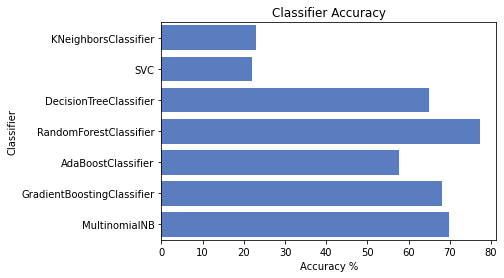

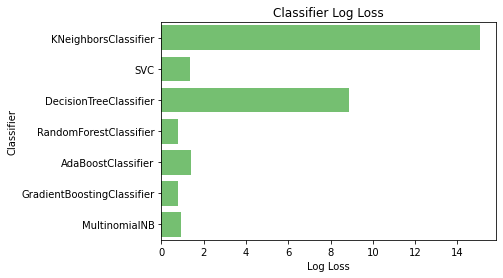

In [114]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

In [116]:
classifier_RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False)

In [117]:
model_pipe_RF = Pipeline( [ ('vectorizer', tfvectorizer), 
                         ('classifier', classifier_RF) ] )

In [118]:
model_pipe_RF.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function tokeniser at 0x7fd801108160>)),
                ('classifier', RandomForestClassifier(max_features='auto'))])

In [119]:
preds_RF = model_pipe_RF.predict(X_test)

In [120]:
preds_RF[:10]

array(['letter', 'questionnaire', 'invoice', 'form', 'form', 'resume',
       'resume', 'resume', 'invoice', 'letter'], dtype=object)

In [121]:
X_test[:10]

507        COUNCIL FOR TOBACCO RESEARCH - U.S.A., INC....
1131     : DATABASE UTALOGUE QUESTIONNAIRE PM "RECONTA...
210        DONREY   POSTER INVOICE       |            ...
1345       TEST RESULT CERTIFICATE        | i   2006 O...
1465     TEST DATA SHEET test Submitted By: Pages: Sol...
693      PRINCIPAL BIOGRAPHICAL SKETCH tne information...
781      BIOGRAPHICAL SKETCH and            TITLE Rita...
720        R: REDACTED MATERIAL SKETCH information on ...
239      PHILIP MORRIS                       Benson & ...
430            January 9, 1979 Mr. Dewitt Tobacco Corp...
Name: text, dtype: object

In [122]:
y_test[:10]

507            letter
1131    questionnaire
210           invoice
1345             form
1465             form
693            resume
781            resume
720            resume
239           invoice
430            letter
Name: doc_type, dtype: object

In [123]:
# Accuracy
print("Train Accuracy: ", model_pipe_RF.score(X_train, y_train))

# Accuracy
print("Test Accuracy: ", model_pipe_RF.score(X_test, y_test))

Train Accuracy:  0.9346613545816733
Test Accuracy:  0.7261146496815286


In [124]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [125]:
confusion_matrix(y_test,preds_RF)

array([[44,  8,  1, 15,  1],
       [ 9, 40,  4, 13,  0],
       [ 2,  3, 47, 14,  2],
       [ 2,  6,  1, 42,  2],
       [ 1,  0,  0,  2, 55]])

In [126]:
vectorized_df_X=tfvectorizer.fit_transform(X_train)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [127]:
vectorized_df_X_test=tfvectorizer.transform(X_test)

In [128]:
classifier_RF

RandomForestClassifier(max_features='auto')

In [129]:
grid_param = {
    'n_estimators': [50, 75, 100, 120, 200],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

In [130]:
from sklearn.model_selection import GridSearchCV

In [131]:
gd_sr = GridSearchCV(estimator=classifier_RF,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=3,
                     n_jobs=-1)

In [132]:
gd_sr.fit(vectorized_df_X, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(max_features='auto'),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'n_estimators': [50, 75, 100, 120, 200]},
             scoring='accuracy')

In [133]:
best_parameters = gd_sr.best_params_
print(best_parameters)

{'bootstrap': False, 'criterion': 'gini', 'n_estimators': 200}


In [134]:
gd_sr.best_estimator_

RandomForestClassifier(bootstrap=False, max_features='auto', n_estimators=200)

In [135]:
best_result = gd_sr.best_score_
print(best_result)

0.7442380087776393


In [136]:
# Accuracy
print("Train Accuracy: ", gd_sr.score(vectorized_df_X, y_train))

# Accuracy
print("Test Accuracy: ", gd_sr.score(vectorized_df_X_test, y_test))

Train Accuracy:  0.9346613545816733
Test Accuracy:  0.7579617834394905


###################################################################